In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Python/Website Traffic Forecasting/Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [ ]:
data["Date"] = pd.to_datetime(data["Date"], format = "%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


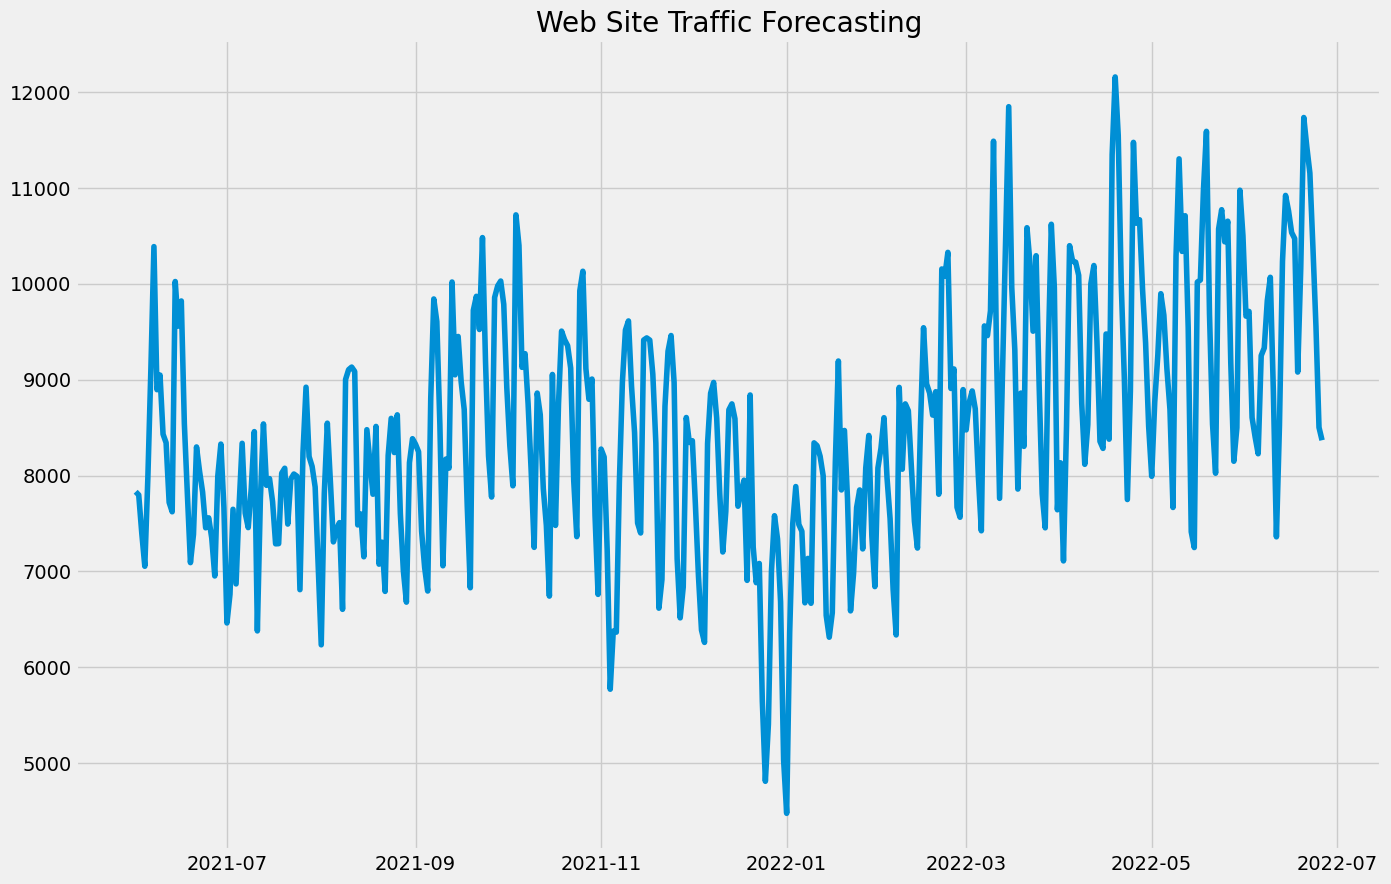

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"], data['Views'])
plt.title("Web Site Traffic Forecasting")
plt.show()

<Figure size 640x480 with 0 Axes>

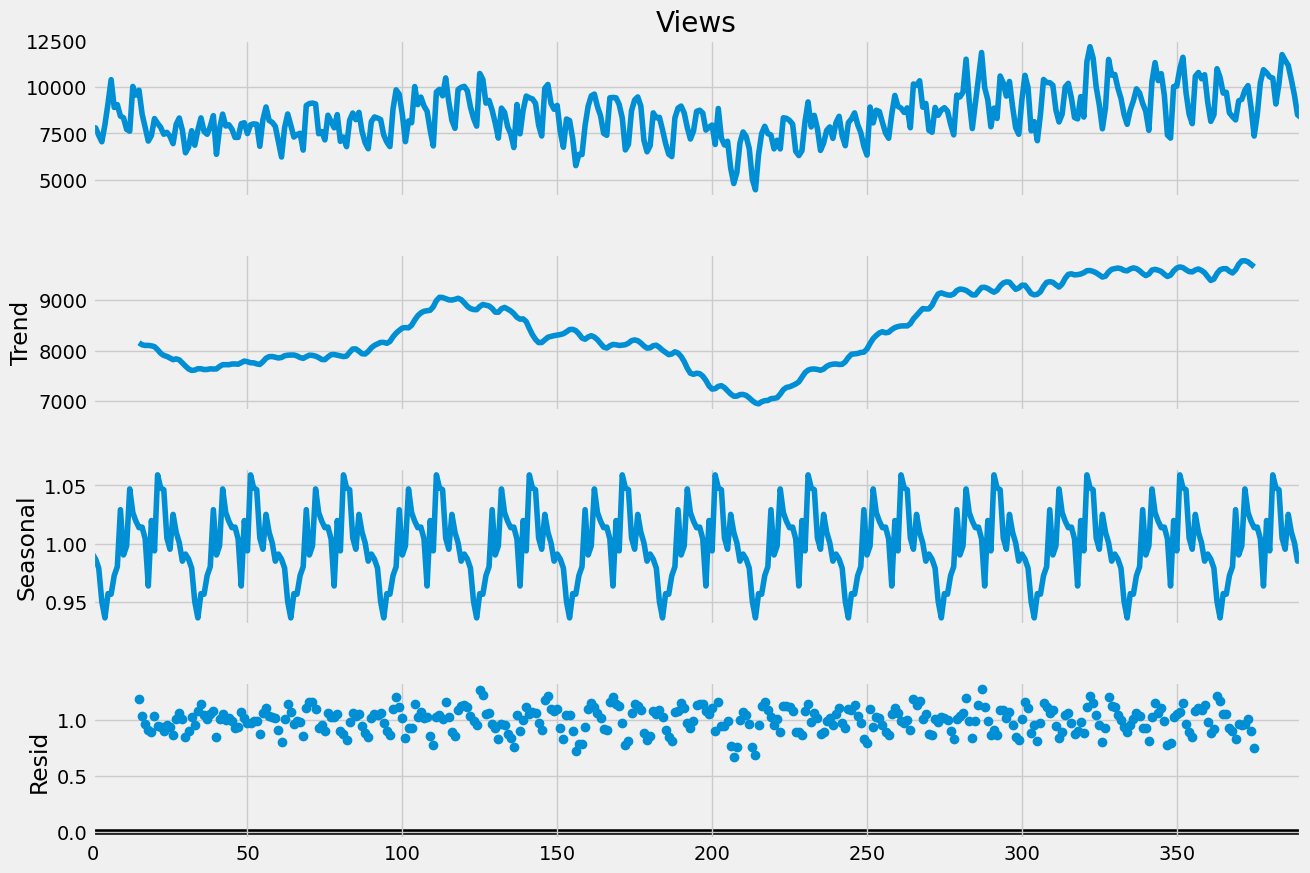

In [ ]:
result = seasonal_decompose(data["Views"],
                            model='multiplicative',
                            period=30)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

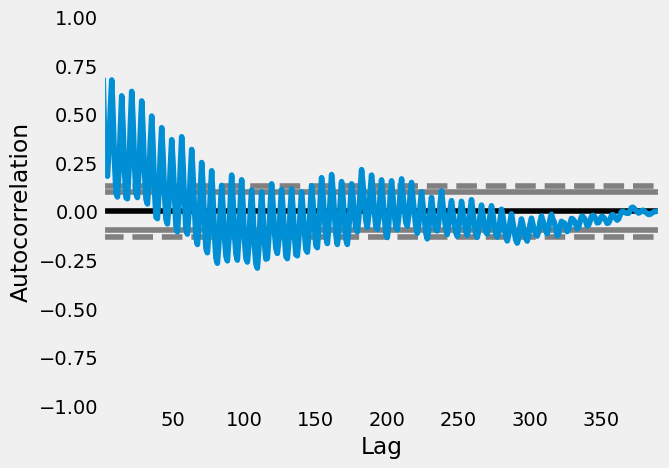

In [ ]:
pd.plotting.autocorrelation_plot(data['Views'])

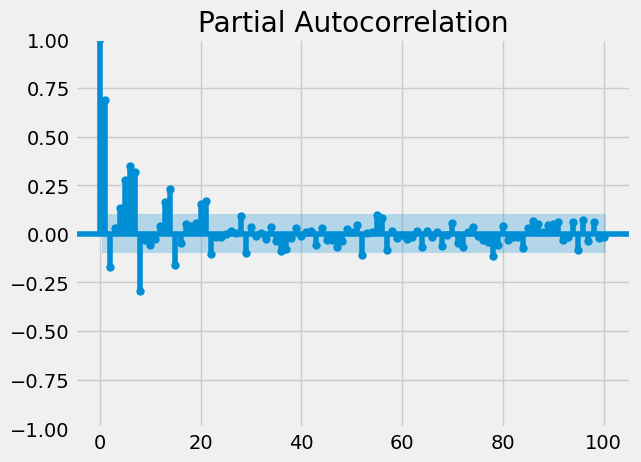

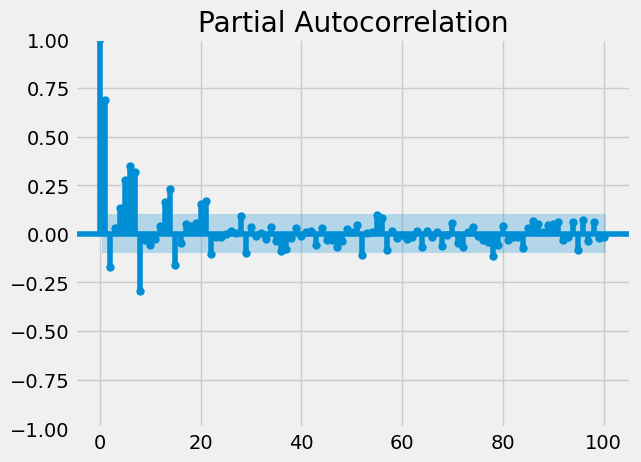

In [ ]:
plot_pacf(data['Views'],lags = 100)

In [ ]:
p , d , q = 5 , 1 , 2
model = sm.tsa.statespace.SARIMAX(data['Views'],order=(p,d,q),seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.052
Date:                            Sat, 06 Jul 2024   AIC                           6228.104
Time:                                    14:57:43   BIC                           6287.127
Sample:                                         0   HQIC                          6251.530
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7394      0.130      5.696      0.000       0.485       0.994
ar.L2         -0.7892      0.134   

In [ ]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9885.647737
392    10855.361597
393    10725.051365
394     9828.059279
395     8824.289414
396     8300.183783
397     8949.513213
398     9745.277758
399    10353.338143
400    10578.741349
401     9883.800360
402     9329.632515
403     9005.638396
404     9078.941894
405    10487.891086
406    11009.439207
407    10916.618529
408    10089.760403
409     9422.263831
410     8629.263400
411     9164.667004
412    10344.709609
413    10703.173078
414    10851.358088
415    10275.869403
416     9425.038450
417     8988.807212
418     9178.557035
419    10003.114691
420    10369.257029
421    10786.438347
422     9937.805230
423     9529.679920
424     8978.573003
425     8889.000917
426    10212.106718
427    10936.393657
428    10940.448619
429    10350.456919
430     9403.312126
431     8676.332354
432     8732.720054
433    10130.564929
434    10605.927773
435    10901.099383
436    10423.594907
437     9332.921721
438     9190.436362
439     9413.960861
440    10364.213567


<Axes: >

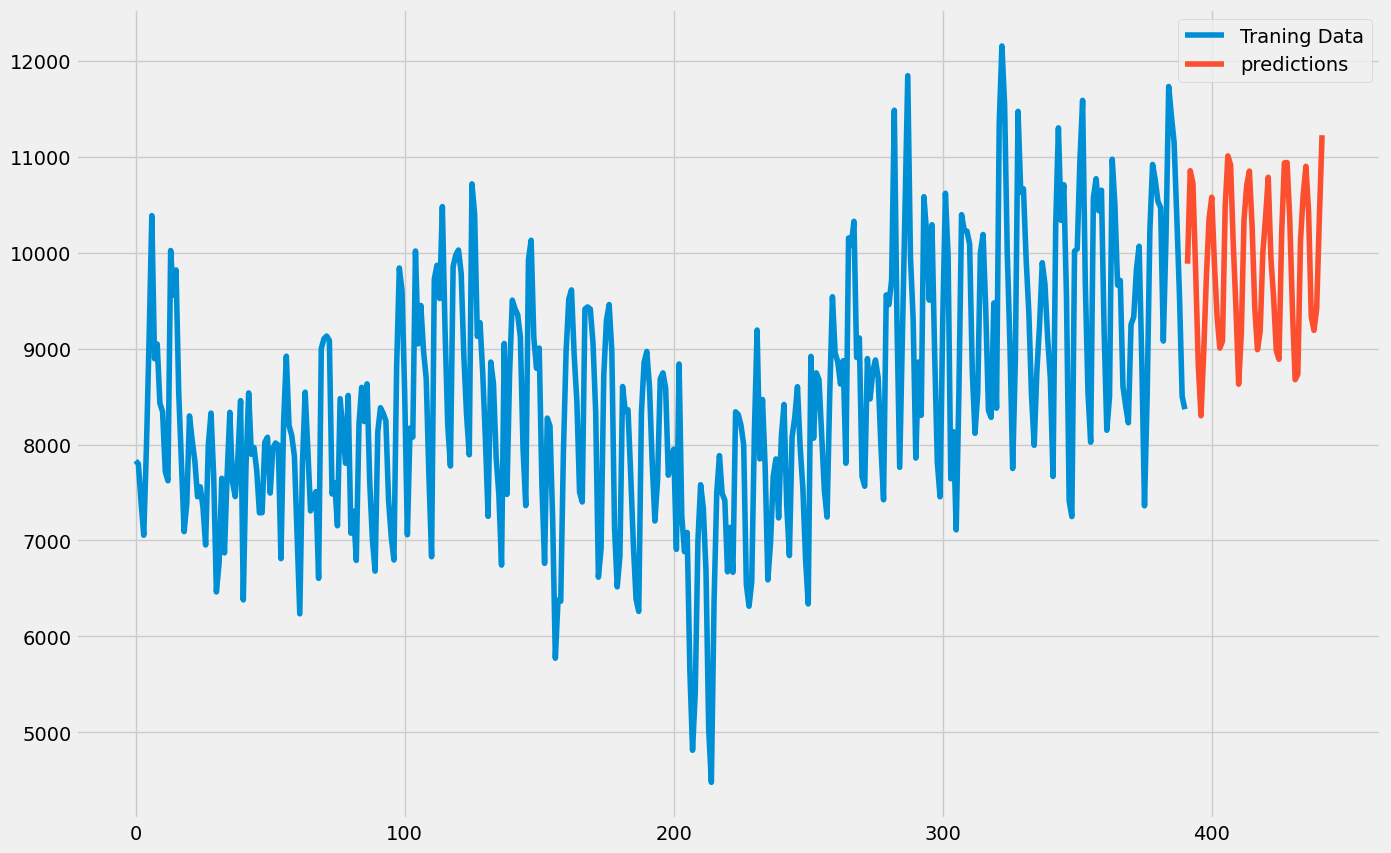

In [ ]:
data['Views'].plot(legend=True, label='Traning Data',figsize=(15,10))
predictions.plot(legend=True, label ='predictions')